Задача 1 <br>
Разная рекурсия работает для разных значений a <br>
Для вывода рекуррентного соотношения см. пдф

In [11]:
import numpy as np
a = 0.1
I0 = - np.log(a) + np.log(1 + a)
IN = []
IN.append(I0)
for i in range (1, 50):
    INN = 1 / i - a * IN[i - 1] 
    IN.append(INN)
#for i in range (50):
#    print(i, IN[i])
print(IN[25])
a = 10
I0 = - np.log(a) + np.log(1 + a)
IN = []
IN.append(I0)
for i in range (1, 50):
    INN = 1 / i - a * IN[i - 1] 
    IN.append(INN)
#for i in range (50):
#    print(i, IN[i])
print(IN[25])

#Part 2

print ("\n")
a = 0.1
IN = np.zeros(50)
for i in range (48, 0, -1):
    INN = ((1 / i) - IN[i + 1]) / a
    IN[i] = INN
#for i in range (49, 0, -1):
#    print(i - 1, IN[i])
print (IN[26])
a = 10
IN = np.zeros(50)
for i in range (48, 0, -1):
    INN = ((1 / i) - IN[i + 1]) / a
    IN[i] = INN
#for i in range (49, 0, -1):
#    print(i - 1, IN[i])
print(IN[26])

0.03622697090911682
916988169.5363449


1.8902904607368906e+21
0.0035083534096819772


Задача 2 <br>
Спойлеры: <br>
Складывать всегда приятнее, чем вычитать. Одно дело посчитать 10^10 - sqrt(10^20 - 9) и получить 0, а другое дело 10^10 + sqrt(10^20 - 9) и получить 2 * 10^10. <br>
Как получено? Домножить всё на - b - sqrt(b^2 - 4 * a * c) 

In [12]:
#наивная версия
import cmath
from numpy import allclose
def solve_quad(b, c):
    print (b, c)
    d = b ** 2 - 4 * c
    x1 = (-b + cmath.sqrt(d)) / 2
    x2 = (-b - cmath.sqrt(d)) / 2
    return(x1, x2)
variants = [{'b': 4.0, 'c': 3.0},
            {'b': 2.0, 'c': 1.0},
            {'b': 0.5, 'c': 4.0},
            {'b': 1e10, 'c': 3.0},
            {'b': -1e10, 'c': 4.0},]
for var in variants:
    x1, x2 = solve_quad(**var)
    print(x1, x2)
    print(allclose(x1*x2, var['c']))

4.0 3.0
(-1+0j) (-3+0j)
True
2.0 1.0
(-1+0j) (-1+0j)
True
0.5 4.0
(-0.25+1.984313483298443j) (-0.25-1.984313483298443j)
True
10000000000.0 3.0
0j (-10000000000+0j)
False
-10000000000.0 4.0
(10000000000+0j) 0j
False


In [13]:
#ленивая версия
import numpy as np
from numpy import allclose
def solve_quad(b, c):
    a = 1
    coeff = []
    coeff.append(a)
    coeff.append(b)
    coeff.append(c)
    k = np.roots(coeff)
    return(k[0], k[1])
variants = [{'b': 4.0, 'c': 3.0},
            {'b': 2.0, 'c': 1.0},
            {'b': 0.5, 'c': 4.0},
            {'b': 1e10, 'c': 3.0},
            {'b': -1e10, 'c': 4.0},]
for var in variants:
    x1, x2 = solve_quad(**var)
    print(x1, x2)
    print(allclose(x1*x2, var['c']))

-3.0 -1.0
True
-1.0 -1.0
True
(-0.25+1.984313483298443j) (-0.25-1.984313483298443j)
True
-10000000000.0 -3e-10
True
10000000000.0 4e-10
True


In [14]:
#спортивная версия
import cmath
from numpy import allclose
def solve_quad(b, c):
    discriminant_root = cmath.sqrt(b ** 2 - 4 * c)
    if b > 0:
        x1 = (2 * c) / (- b - discriminant_root)
        x2 = (- b - discriminant_root) / 2
    else:
        x1 = (2 * c) / (- b + discriminant_root)
        x2 = (- b + discriminant_root) / 2
    return(x1, x2)

variants = [{'b': 4.0, 'c': 3.0},
            {'b': 2.0, 'c': 1.0},
            {'b': 0.5, 'c': 4.0},
            {'b': 1e10, 'c': 3.0},
            {'b': -1e10, 'c': 4.0},]
for var in variants:
    x1, x2 = solve_quad(**var)
    print(x1, x2)
    print(allclose(x1*x2, var['c']))

(-1-0j) (-3+0j)
True
(-1-0j) (-1+0j)
True
(-0.24999999999999994+1.9843134832984428j) (-0.25-1.984313483298443j)
True
(-3e-10-0j) (-10000000000+0j)
True
(4e-10+0j) (10000000000+0j)
True


Задача 3 <br>
Спойлеры: повызывать от 0 до 5, анзац и закономерность очевидна <br>
recur(n) as R(n) <br>
R(n) = -R(n-1) + 6 * R(n-2) <br>
-(-3)^(n - 1) + 6 * (-3)^(n - 2) = (-3)^(n - 2) * (6 + 3) = (-3)^n <br>
9 is (-3)^2

In [15]:
def recur(n):
    if n == 0:
        return 1
    if n == 1:
        return -3
    return -recur(n - 1) + 6 * recur(n - 2)
for i in range(5):
    print(recur(i))

1
-3
9
-27
81


In [16]:
def recur_but_better(n):
    return ((-1) ** n) * (3 ** n)
for i in range(5):
    print(recur_but_better(i))
print(recur_but_better(2020))

1
-3
9
-27
81
6094450215462886010919940416159254127780495398343273822400801771940404638186197296791197565226726678937781620863297441239558499217634492330093866862512960199927792151337515405513496336097533368085315608842562937022842989249443889665488026163845297981733782426710440981541671342546819992931476270732407611257266864638291596946069546644928918529283838841114942775639171108733116510342689217842786426858890817486023525224913449449057091610680380444303515347686193560754457357577358311984589944305711672104447846457597497325597148746621694319977411609918054783537457754061394740543917588964751296073494373298939193652780227334988145003968276730589305786515481671932576229601073273732457845542705245754068836962651469188153170543381185267277860444863733610333666092998068734804981847751641065840161957814809001437004653380692726928539871118976964306949627015659054111021337754025550333370294349731458099300434065118554291718263099376809887558860852157968857126733224401


Задача 4 <br>
См. пдф, это, скорее всего, неправильно и не то, что требовалось <br>
10 -> 0.5 <br>
0.1 -> 5 

3.5399644065066096 0.4975309105311169


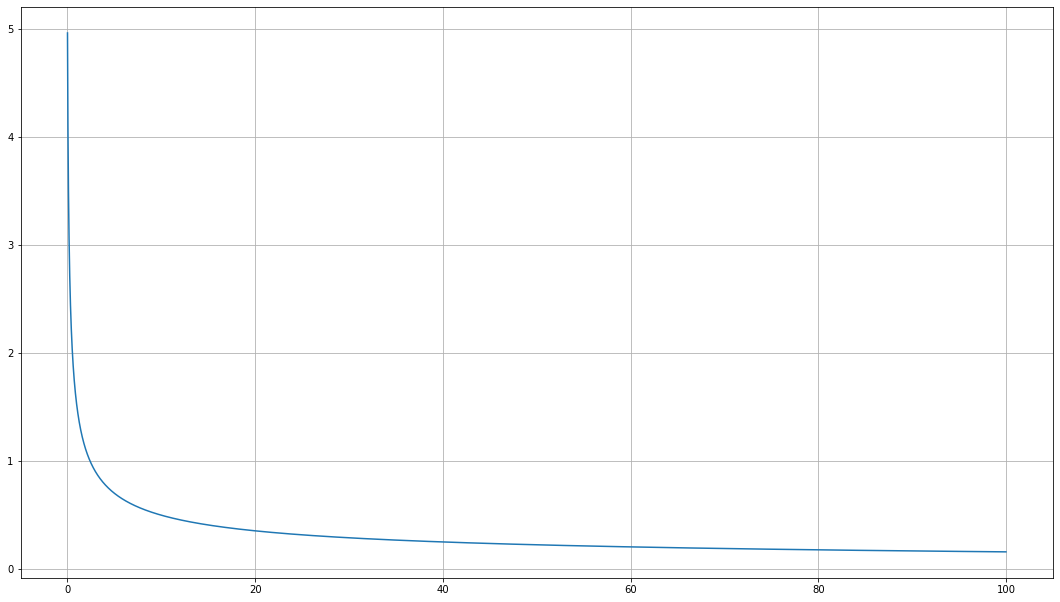

In [17]:
import math as cm
import matplotlib.pyplot as plt
import numpy as np
def get_higher_value(c):
    return ((2 + cm.sqrt(4 + 40* c )) / 2)
deltas=[]
values=[]
diff_v=[]
diff_d=[]
d=[]
deltas.append(0)
values.append(1)
for  i in range (1, 100000):
    values.append(get_higher_value(i/1000))
    deltas.append(i/1000)
    diff_v.append(values[i]-values[i-1])
    diff_d.append(deltas[i]-deltas[i-1])
    if i != 1:
        d.append(diff_v[i-1]/diff_d[i-1])
x = np.linspace(0.001, 100, 99998)
plt.plot(x, d)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
print(d[98], d[9998])

Задача 5 <br>
Первые члены ряда достаточно большие, в то время как последние малы, что приводит к слабому изменению res. <br>
Тем не менее, ошибка округления никуда не делась, из-за этого суммарная ошибка возрастает. <br>
Если суммировать сверху-вниз, то ошибки округления будут колебаться около очень малых значений и не дадут заметного вклада (можно посмотреть на Decimal).

In [18]:
import math
from decimal import *
def round_to_n(x, n): 
    if x == 0:
        return x
    else:
        return round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))

print(round_to_n(1.987654321, 4), "\n") #Убеждаюсь, что она действительно округляет как надо
res = 0
for k in range(1, 3001):
   # print (Decimal(res), Decimal(1/k**2))
    res = round_to_n(res+1/k**2, 4)
print(round_to_n(res, 4)) 
res = 0
for k in range(3000, 0, -1):
   # print (Decimal(res), Decimal(1/k**2))
    res = round_to_n(res+1/k**2, 4)
print(round_to_n(res, 4)) 

1.988 

1.624
1.645
